<a href="https://colab.research.google.com/github/jsilryan/Deep-Learning-Practice/blob/master/Pytorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import torch
torch.cuda.is_available()

True

In [9]:
# Setup device agnostic code -> https://pytorch.org/docs/1.0.1/notes/cuda.html
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [10]:
# Count number of devices
torch.cuda.device_count()

1

In [3]:
!nvidia-smi

Tue Jul 25 07:57:30 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Put Tensors and Models on the GPU

In [11]:
#Create a tensor (default is on CPU)
tensor = torch.tensor([1,2,3], device = "cpu")
print(tensor, tensor.device)

tensor([1, 2, 3]) cpu


In [12]:
#Move to GPU if available
tensor_on_gpu = tensor.to(device)
tensor_on_gpu

tensor([1, 2, 3], device='cuda:0')

### Move tensors back to CPU

In [13]:
# Can't transform a tensor to NumPy if on GPU
# tensor_on_gpu.numpy()
# Forst set it to CPU
tensor_on_cpu = tensor_on_gpu.cpu().numpy()
tensor_on_cpu

array([1, 2, 3])

In [14]:
new_tensor = torch.rand(7,7)
new_tensor

tensor([[0.6021, 0.3505, 0.7628, 0.7331, 0.5101, 0.7163, 0.1590],
        [0.4090, 0.2819, 0.3064, 0.7700, 0.6728, 0.1277, 0.4670],
        [0.0932, 0.8598, 0.8714, 0.7874, 0.4606, 0.3317, 0.3208],
        [0.5432, 0.9153, 0.4211, 0.6347, 0.3120, 0.7129, 0.5912],
        [0.6487, 0.0089, 0.1697, 0.9292, 0.3087, 0.4587, 0.0769],
        [0.9433, 0.2072, 0.8235, 0.6817, 0.6817, 0.3881, 0.2511],
        [0.7697, 0.8675, 0.4777, 0.7443, 0.6030, 0.9448, 0.9323]])

Exercise:
1. Read Torch.tensor, torch.cuda

In [15]:
new_tensor1 = torch.rand(1,7)
new_tensor1

tensor([[0.8299, 0.5206, 0.6863, 0.0499, 0.8720, 0.2706, 0.7291]])

In [16]:
new_tensor1.T # Transposing it

tensor([[0.8299],
        [0.5206],
        [0.6863],
        [0.0499],
        [0.8720],
        [0.2706],
        [0.7291]])

In [17]:
torch.matmul(new_tensor, new_tensor1.T)

tensor([[1.9969],
        [1.6966],
        [1.8876],
        [2.1441],
        [1.1552],
        [2.3725],
        [2.9166]])

In [18]:
seed = 0
torch.manual_seed(seed)
new_tensor2 = torch.rand(7,7)
print(new_tensor2)
torch.manual_seed(seed)
nt_3 = torch.rand(1,7)
nt_3T = nt_3.T
print(nt_3, "\n", nt_3T)
nt_4 = torch.matmul(new_tensor2, nt_3T)
print(nt_4)

tensor([[0.4963, 0.7682, 0.0885, 0.1320, 0.3074, 0.6341, 0.4901],
        [0.8964, 0.4556, 0.6323, 0.3489, 0.4017, 0.0223, 0.1689],
        [0.2939, 0.5185, 0.6977, 0.8000, 0.1610, 0.2823, 0.6816],
        [0.9152, 0.3971, 0.8742, 0.4194, 0.5529, 0.9527, 0.0362],
        [0.1852, 0.3734, 0.3051, 0.9320, 0.1759, 0.2698, 0.1507],
        [0.0317, 0.2081, 0.9298, 0.7231, 0.7423, 0.5263, 0.2437],
        [0.5846, 0.0332, 0.1387, 0.2422, 0.8155, 0.7932, 0.2783]])
tensor([[0.4963, 0.7682, 0.0885, 0.1320, 0.3074, 0.6341, 0.4901]]) 
 tensor([[0.4963],
        [0.7682],
        [0.0885],
        [0.1320],
        [0.3074],
        [0.6341],
        [0.4901]])
tensor([[1.5985],
        [1.1173],
        [1.2741],
        [1.6838],
        [0.8279],
        [1.0347],
        [1.2498]])


In [19]:
#Manual seed for cuda
new_seed = 1234
torch.manual_seed(new_seed)
nt_5 = torch.rand(2,3)
print(nt_5, "\n")
torch.manual_seed(new_seed)
nt_6 = torch.rand(2,3)
print(nt_6)
nt_7 = nt_6.T
nt_8 = torch.matmul(nt_5, nt_7)
print(nt_8)


tensor([[0.0290, 0.4019, 0.2598],
        [0.3666, 0.0583, 0.7006]]) 

tensor([[0.0290, 0.4019, 0.2598],
        [0.3666, 0.0583, 0.7006]])
tensor([[0.2299, 0.2161],
        [0.2161, 0.6287]])


In [20]:
print(nt_8.min(), nt_8.max())
print(nt_8.argmin(), nt_8.argmax())

tensor(0.2161) tensor(0.6287)
tensor(1) tensor(3)


In [21]:
seed = 7
torch.manual_seed(seed)
nt_9 = torch.rand(1,1,1,10)
torch.manual_seed(seed)
nt_10 = nt_9.squeeze() #removes dimensions with size 1
print(nt_9, nt_9.shape) # or .size()
print(nt_10, nt_10.shape)


tensor([[[[0.5349, 0.1988, 0.6592, 0.6569, 0.2328, 0.4251, 0.2071, 0.6297,
           0.3653, 0.8513]]]]) torch.Size([1, 1, 1, 10])
tensor([0.5349, 0.1988, 0.6592, 0.6569, 0.2328, 0.4251, 0.2071, 0.6297, 0.3653,
        0.8513]) torch.Size([10])


### Pytorch Workflow
1. Get Data Ready -> Prepare and load data
2. Build or pick a pretrained model to suit my problem -> Pick a loss function and optimizer -> Build a training loop
3. Fit the model to data and make a prediction
4. Evaluate the model -> Make predictions
5. Improve through experimentation
6. Save and reload the model

In [22]:
import torch
from torch import nn #Has all basic buildig blocks for graphs -> Basic neural network
import matplotlib.pyplot as plt

#pytorch version
torch.__version__

'2.0.1+cu118'

## 1. Data (preparing and loading)

* Excel spreadsheet
* Images of any kind
* Videos
* Audio
* DNA
* Text

ML is a game of 2 parts:
1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation

Linear Regression Formula:
* Y = mX + C
* Make a straught line with known parameters

In [25]:
#Known Parameters
weight = 0.7 # m
bias = 0.3 # C

#Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) # Capital - Matrix or tensor -> Unsqueeze adds an extra dimension
y = weight * X + bias# Lowercase - Vector
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [26]:
len(X), len(y)
#I want to learn the representaion of my input and how it maps to the output

(50, 50)

### Split data to training and testing
Helps in generalization -> ability for a machine to perform well on data it hasn't seen before.
Course Material (training set -> 60-80%)
Practice exam (validation set -> 10-20%)
Final exam (test set -> 10-20%)

Scikit learn's train test split

In [27]:
#Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

Visualize

In [37]:
def plot_predictions(train_data = X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None
                     ):
  """
  Plots training data, test data and compares predictions
  """
  plt.figure(figsize=(10,7))

  #Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=10, label="Training data")

  # Plot test data in orange
  plt.scatter(test_data, test_labels, c="g", s=20, label="Testing data")

  #Predictions
  if predictions is not None:
    # Plot predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show legend
  plt.legend(prop={"size": 14})

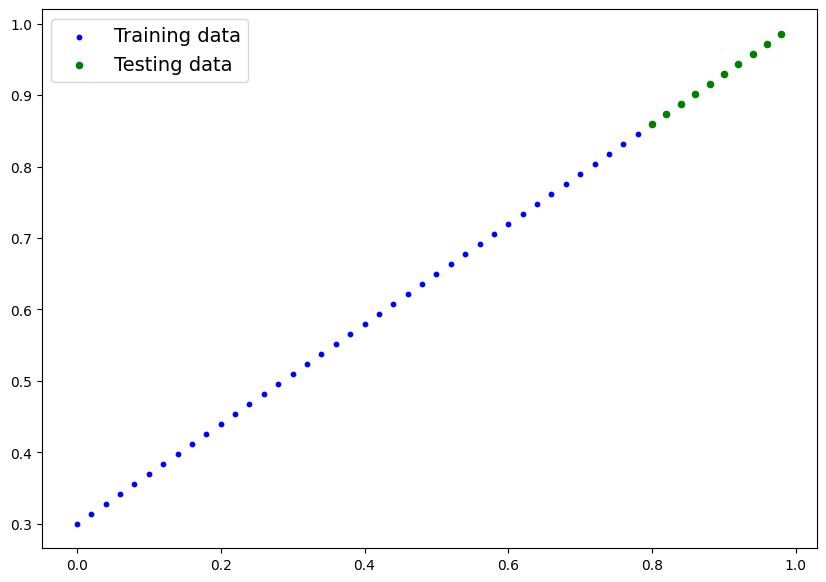

In [38]:
plot_predictions()

## Model
OOP in python -> Real Python

The model runs the random weight and bias values through the forward calculation and adjusts the weight and bias to represent as close as possible if not perfect, the known params.

What it does:
* Start with random values (weight and bias)
* Look at the training data and adjust the random values to better represent (or get closer to) the ideal values (weight and bias we used to create the data).

How it does so:
1. Gradient descent -> requires-grad=True -> keeps track of the weights and bias parameters and updates them using a combination of the 2
2. Back propagation

In [ ]:
#Linear Regression model class
class LinearRegressionModel(nn.Module): #<-Inherit almost everything on Pytorch - Base class for all neural network modules
  def __init__(self): #Constructor
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float32))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

    #Forward method to define the computation in model
    def forward(self, x: torch.Tensor) -> torch.Tensor: #x is the input data
      return self.weights * x +  self.bias


